# Titanic Machine Learning Problem

import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import data

In [2]:
titanic = pd.read_csv("C:\Data Sets\Titanic\Titanic.csv")

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


import country data

# Data Cleaning

In [3]:
country = pd.read_csv("C:\Data Sets\Titanic\country.txt", sep=" ")

country.head()

,Embarked,City,Country
0,C,Cherbourg,France
1,Q,Queenstown,England
2,S,Southampton,England


merge titanic data and country data

In [4]:
df = pd.merge(titanic, country, on = 'Embarked')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,City,Country
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Southampton,England
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton,England
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Southampton,England
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Southampton,England
4,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Southampton,England


finiding missing values

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
City             0
Country          0
dtype: int64

# Variable Cleaning & Engineering

nothing to do on Survived and Pclass 

I suspect that a person's title might have influenced their chances of survival or lack there of.
A simple example of this is the known fact that a lot of Mr's did not survive. Now let's extract titles from the  name ariable. It looks like this vaiable has the consistent form: "Surname, Title. Name". This makes the job easy. I will just separate the string by delimeters as follows:

In [6]:
N1 = pd.DataFrame(df['Name'].str.split(pat = '.', n = 1, expand= True))

N1.head()

,0,1
0,"Braund, Mr",Owen Harris
1,"Heikkinen, Miss",Laina
2,"Futrelle, Mrs",Jacques Heath (Lily May Peel)
3,"Allen, Mr",William Henry
4,"McCarthy, Mr",Timothy J


In [7]:
N1 = N1.drop(columns = [1])

N1.head()

,0
0,"Braund, Mr"
1,"Heikkinen, Miss"
2,"Futrelle, Mrs"
3,"Allen, Mr"
4,"McCarthy, Mr"


In [8]:
N2 = pd.DataFrame(N1[0].str.split(pat = ',', n = 1, expand= True))

N2.head()

,0,1
0,Braund,Mr
1,Heikkinen,Miss
2,Futrelle,Mrs
3,Allen,Mr
4,McCarthy,Mr


In [9]:
df['Title']= N2[1]

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,City,Country,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Southampton,England,Mr
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton,England,Miss
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Southampton,England,Mrs
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Southampton,England,Mr
4,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Southampton,England,Mr


convert the title to int

In [10]:
T = {' Mr': 0, ' Mrs': 1, ' Miss': 2, ' Master': 3, ' Don': 4, ' Rev': 5, ' Dr': 6,
     ' Mme': 7, ' Ms': 8, ' Major': 9, ' Lady': 10, ' Sir': 11, ' Mlle': 12, ' Col': 13,
     ' Capt': 14, ' the Countess': 15, ' Jonkheer': 16}


df['Title'] = df['Title'].map(T).astype(int)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,City,Country,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Southampton,England,0
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton,England,2
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Southampton,England,1
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Southampton,England,0
4,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Southampton,England,0


In [11]:
df['Title'].describe()

count    889.000000
mean       0.934758
std        1.726912
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       16.000000
Name: Title, dtype: float64

In [12]:
df = df.drop(columns = ['Name'])

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,City,Country,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Southampton,England,0
1,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton,England,2
2,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Southampton,England,1
3,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Southampton,England,0
4,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,Southampton,England,0


In [13]:
S = {'male': 1, 'female': 0}

df['Sex'] = df['Sex'].map(S).astype(int)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,City,Country,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,Southampton,England,0
1,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton,England,2
2,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,Southampton,England,1
3,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,Southampton,England,0
4,7,0,1,1,54.0,0,0,17463,51.8625,E46,S,Southampton,England,0


Let's have a closer look at the Age varible
Emparically Age is a normally distributed variable, when a variable is normally distributed it is safe to replace the missing values with the mean, however, in this example I would like to first explore the impact of Class on Age, I think the average Age in first class in is different from the average Age in 3rd class. People generally afford better travel as they get older. If this is true we will not get the best out of this variable by replacing missing values with the total average. Let's see if it is true.  


In [14]:
df['Age'].groupby(df['Pclass']).mean()

Pclass
1    38.105543
2    29.877630
3    25.140620
Name: Age, dtype: float64

This confirms suspicion, the average first class passenger is 13 year older than the average 3rd class passenger. Let's find out the distribution and spread of Age variable across the different Classes

In [15]:
Std = df['Age'].groupby(df['Pclass']).std()

Median = df['Age'].groupby(df['Pclass']).median()

Mean = df['Age'].groupby(df['Pclass']).mean()

dictionary = {'Mean': Mean, 'Median': Median, 'Std': Std}

df2 = pd.DataFrame(data = dictionary).round()

df2

,Mean,Median,Std
Pclass,,,
1,38.0,37.0,15.0
2,30.0,29.0,14.0
3,25.0,24.0,12.0


* The distributions of each age group appear normal.

* The spread is consistent.

* Based on the above it would be appropriate to use the mean of each class to fill in the missing values

In [16]:
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'), inplace = True)

df['Age'].describe()

count    889.000000
mean      29.241974
std       13.173524
min        0.420000
25%       22.000000
50%       26.000000
75%       36.500000
max       80.000000
Name: Age, dtype: float64

Hey Child! - I decided to derive a "Child" variable from the Age variable. Perhaps children were given special previlages into the lifeboats

* To create this variable we are going to employ the help of NumPy or Numeric Python.
* There is a funtion that you can use in pandas but little NumPy won't hurt.


In [17]:
df['Child'] = np.where(df['Age']>16,  0, 1).astype('int')

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,City,Country,Title,Child
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,Southampton,England,0,0
1,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton,England,2,0
2,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,Southampton,England,1,0
3,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,Southampton,England,0,0
4,7,0,1,1,54.0,0,0,17463,51.8625,E46,S,Southampton,England,0,0


We dont have to do aything to SibSp and to Parch

Let's look at the tcket variable

In [18]:
df['Ticket'].describe()

count        889
unique       680
top       347082
freq           7
Name: Ticket, dtype: object

It has 680 unique values and ut does not appear to have any consistant form, let's drop this one.

In [19]:
df = df.drop(columns = ['Ticket'])

Let's look at Fare

In [20]:
df['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

It looks okay except there are people who paid a fare of 0. These could be crew. 

*Surely, during the escape the crew would priorituze the passengers. 
*Let's create a new variable Crew which is 1 when Fare is 0 and 0 otherwise.

In [21]:
df['Crew'] = np.where(df['Fare']>0,  0, 1).astype('int')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,City,Country,Title,Child,Crew
0,1,0,3,1,22.0,1,0,7.2500,NaN,S,Southampton,England,0,0,0
1,3,1,3,0,26.0,0,0,7.9250,NaN,S,Southampton,England,2,0,0
2,4,1,1,0,35.0,1,0,53.1000,C123,S,Southampton,England,1,0,0
3,5,0,3,1,35.0,0,0,8.0500,NaN,S,Southampton,England,0,0,0
4,7,0,1,1,54.0,0,0,51.8625,E46,S,Southampton,England,0,0,0


Cabin has a lot of missing values - let's drop it, we do not have enough information to enhance it.

In [22]:
df = df.drop(columns = ['Cabin'])

In [23]:
E = {'S': 0, 'Q': 1, 'C': 2}

df['Embarked'] = df['Embarked'].map(E)


C = {'England': 1, 'France': 0}

df['Country'] = df['Country'].map(C)


df = df.drop(columns = ['City'])


In [24]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Country,Title,Child,Crew
0,1,0,3,1,22.0,1,0,7.2500,0,1,0,0,0
1,3,1,3,0,26.0,0,0,7.9250,0,1,2,0,0
2,4,1,1,0,35.0,1,0,53.1000,0,1,1,0,0
3,5,0,3,1,35.0,0,0,8.0500,0,1,0,0,0
4,7,0,1,1,54.0,0,0,51.8625,0,1,0,0,0


The data is now clean, 4 new variables have been added. We are ready for Machine Learning

In [25]:
df = df.drop(columns = ['PassengerId'])

df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Country,Title,Child,Crew
Survived,1.000000,-0.335549,-0.541585,-0.055347,-0.034040,0.083151,0.255290,0.169718,-0.169966,0.289914,0.122737,-0.085125
Pclass,-0.335549,1.000000,0.127741,-0.400493,0.081656,0.016824,-0.548193,-0.164681,0.245733,-0.190567,0.127349,-0.059400
Sex,-0.541585,0.127741,1.000000,0.085725,-0.116348,-0.247508,-0.179958,-0.110320,0.084520,-0.360992,-0.103717,0.096334
Age,-0.055347,-0.400493,0.085725,1.000000,-0.242695,-0.174715,0.117889,0.018659,-0.043799,-0.068046,-0.574198,0.041690
SibSp,-0.034040,0.081656,-0.116348,-0.242695,1.000000,0.414542,0.160887,-0.068900,0.060074,0.148537,0.337527,-0.062254
Parch,0.083151,0.016824,-0.247508,-0.174715,0.414542,1.000000,0.217532,-0.040449,0.011588,0.137558,0.334481,-0.062139
Fare,0.255290,-0.548193,-0.179958,0.117889,0.160887,0.217532,1.000000,0.226311,-0.270731,0.107736,-0.003640,-0.084656
Embarked,0.169718,-0.164681,-0.110320,0.018659,-0.068900,-0.040449,0.226311,1.000000,-0.936244,0.092161,-0.006551,-0.076879
Country,-0.169966,0.245733,0.084520,-0.043799,0.060074,0.011588,-0.270731,-0.936244,1.000000,-0.076513,-0.000931,0.063238
Title,0.289914,-0.190567,-0.360992,-0.068046,0.148537,0.137558,0.107736,0.092161,-0.076513,1.000000,0.227978,0.010012


* none of these variables stand out as bieng highly correlarted with our target variable

# Data Analysis

Pclass

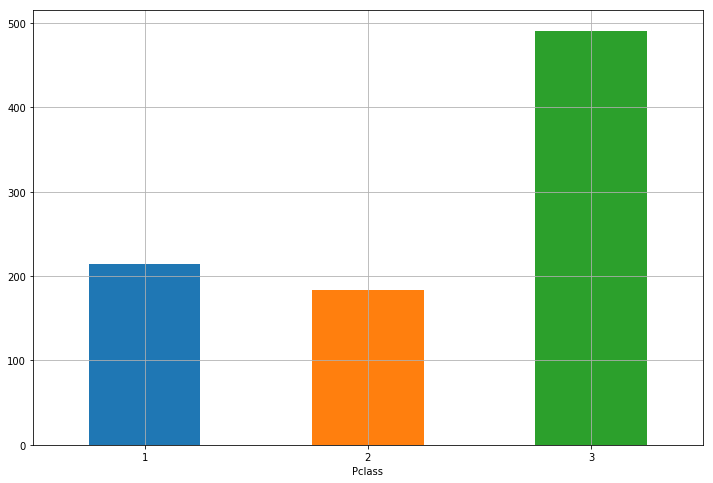

In [26]:
df['Pclass'].groupby(df['Pclass']).count().plot.bar(rot = 0, grid = True, figsize = (12, 8))

Most passengers were 3rd class passengers

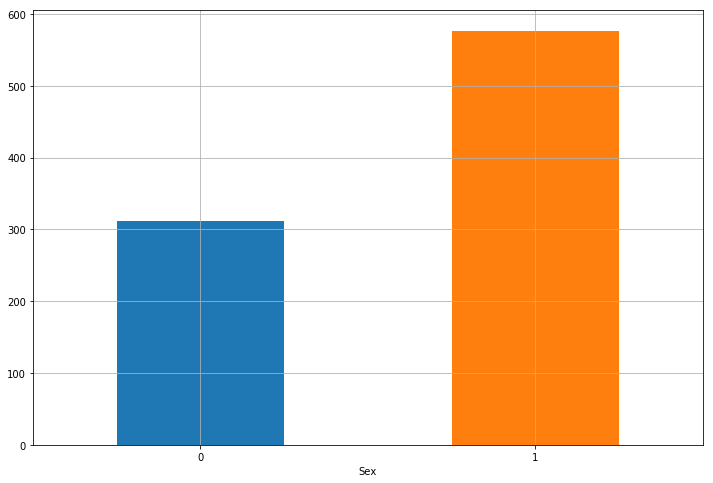

In [27]:
df['Sex'].groupby(df['Sex']).count().plot.bar(rot = 0, grid = True, figsize = (12, 8))

* There were more men then women on the ship

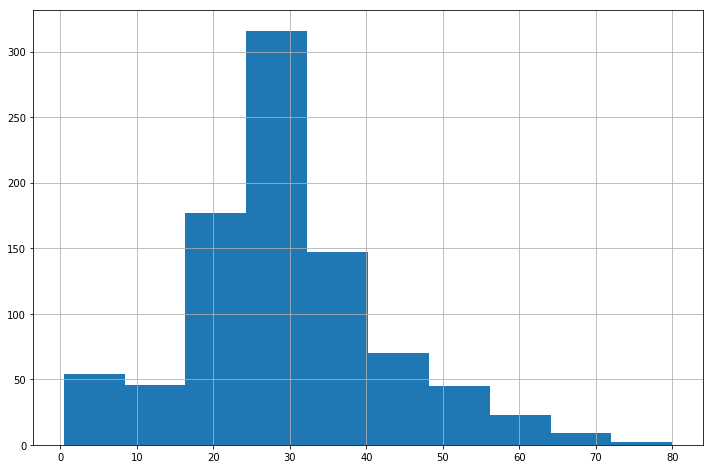

In [28]:
df['Age'].hist(bins = 10, figsize = (12, 8))

* Age is not normally distributed there could be outliers. Let us check!

* The easiest way to check for outliers is to draw a boxplot using Seaborn and matplotlib

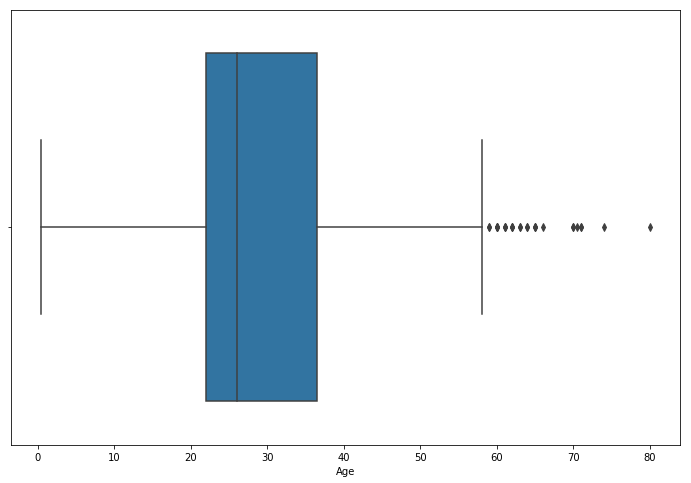

In [29]:
dims = (12, 8)
fig, ax = pyplot.subplots(figsize = dims)
ax = sns.boxplot(x=df['Age'])

Confirmed! Next we will remove these outliers from the data set.

Outliers are observations that are larger than 2 standard deviations above the mean so we must:
* find the standard deviation and the mean 
* turn all observations greater than 2 standard deviations above the mea to nan

In [30]:
mean_age = df['Age'].mean()

stdev_age = df['Age'].std()

upper_limit = mean_age + 2 * stdev_age



In [31]:
upper_limit

55.589021362459896

In [32]:
filter1 = df['Age'] <56

df = df.where(filter1)

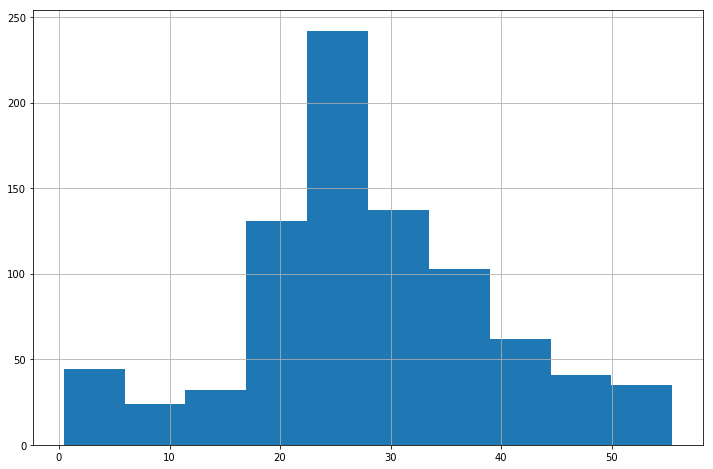

In [33]:
df['Age'].hist(bins = 10, figsize = (12, 8))

A little better

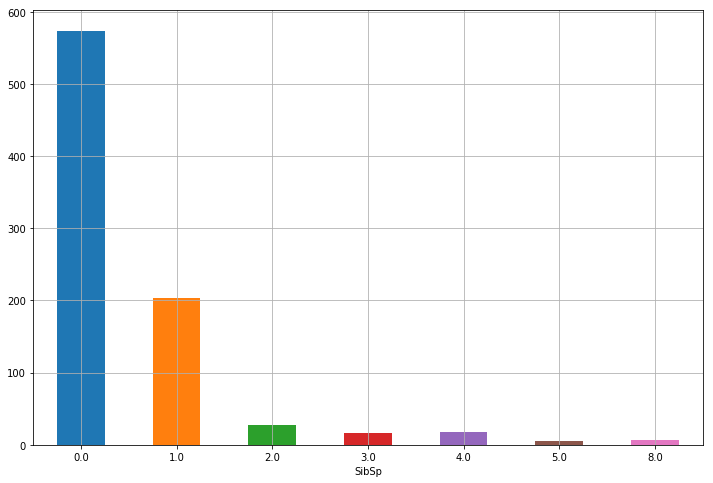

In [34]:
df['SibSp'].groupby(df['SibSp']).count().plot.bar(rot = 0, grid = True, figsize = (12, 8))

the categories here are largly insignificant - I will change this variable to a binary variable that is defined as:
* 0 = has no siblings on board.
* 1 = has siblings onboard.

We'll actually do the same thing for Parch

In [35]:
df['SibSp'] = df['SibSp'].replace([2, 3, 4, 5, 8], 1)

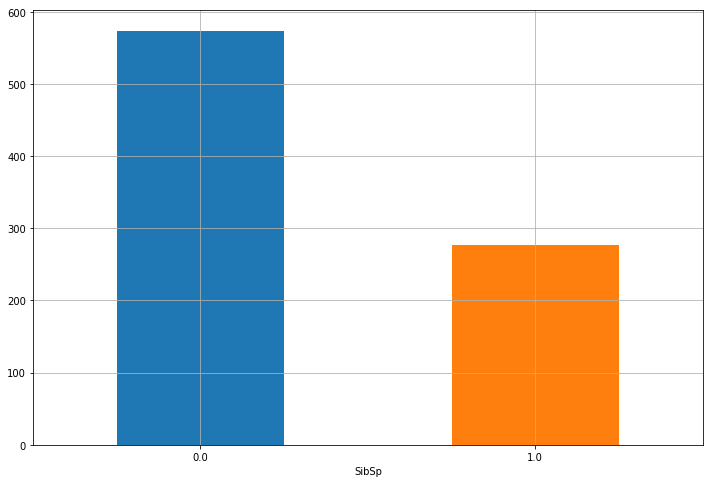

In [36]:
df['SibSp'].groupby(df['SibSp']).count().plot.bar(rot = 0, grid = True, figsize = (12, 8))

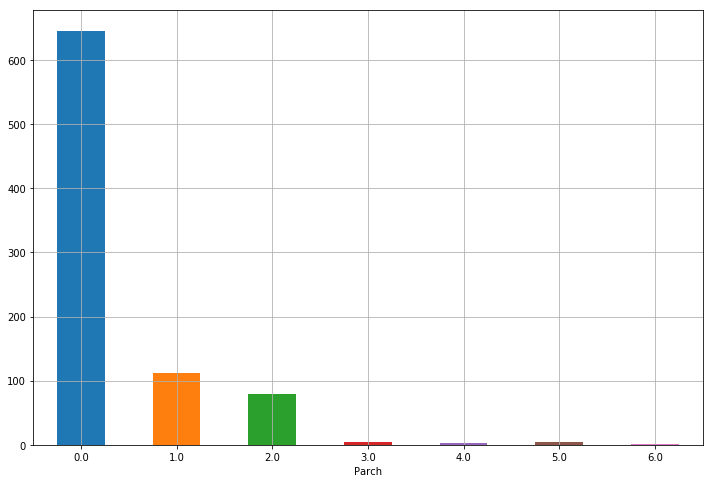

In [37]:
df['Parch'].groupby(df['Parch']).count().plot.bar(rot = 0, grid = True, figsize = (12, 8))

In [38]:
df['Parch'] = df['Parch'].replace([2, 3, 4, 5, 6], 1)

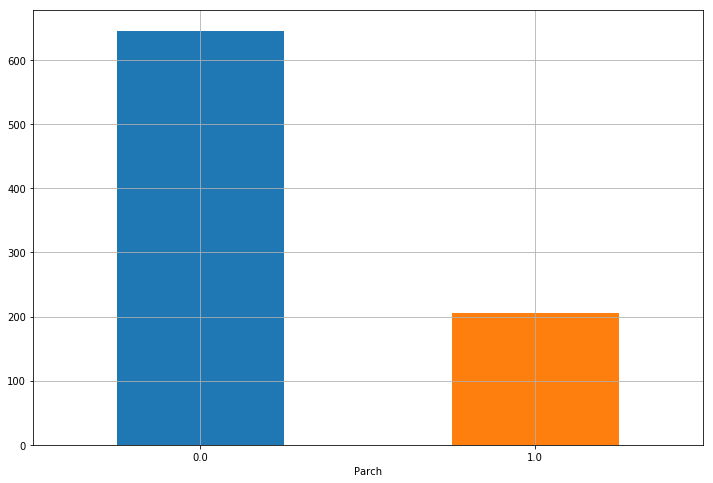

In [39]:
df['Parch'].groupby(df['Parch']).count().plot.bar(rot = 0, grid = True, figsize = (12, 8))

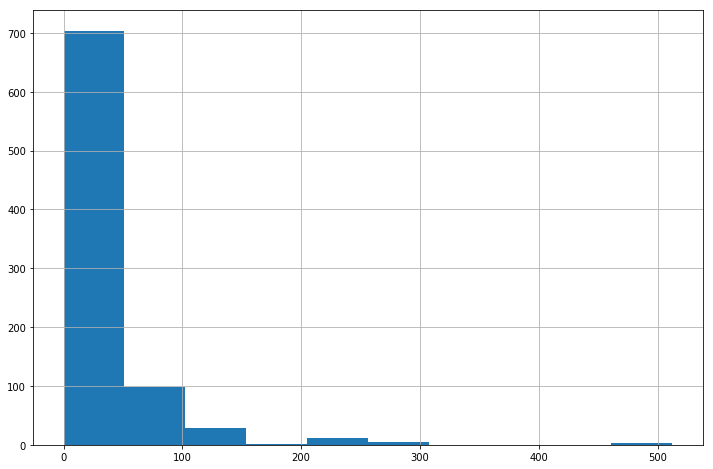

In [40]:
df['Fare'].hist(bins = 10, figsize = (12, 8))

The Fare variable has a log normal distribution, this is expected, Money tends to behave that way. We will just take it's natural logarythm and it will be ready for use. 

To do this, howeverr, we first have to replace 0s with 1s because ln(0) is undefined and ln(1) is 0 

In [41]:
df['Fare'] = df['Fare'].replace(0, 1)

df['Fare'] = np.log(df['Fare'])


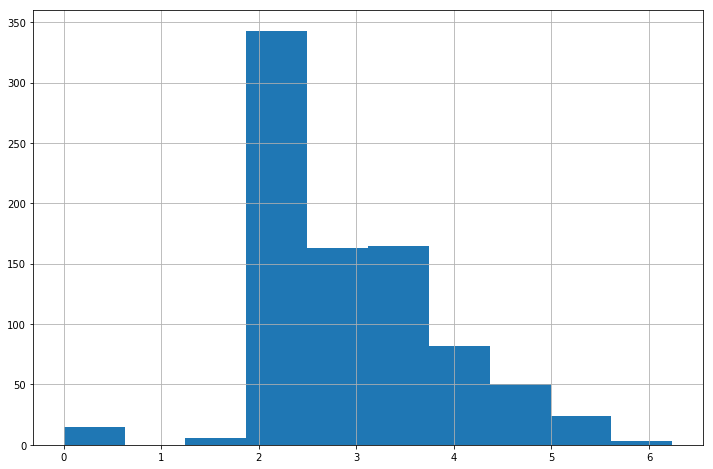

In [42]:
df['Fare'].hist(bins = 10, figsize = (12, 8))

Much better!

The rest of the variables are derived variables - it would not make sense to change them as we actually created them above.


Let us quickly drop the NANs that we created in the previous section

In [43]:
df = df.dropna()

In [44]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Country,Title,Child,Crew
Survived,1.000000,-0.357717,-0.536170,-0.037968,0.112838,0.150926,0.335184,0.172021,-0.169856,0.321415,0.122438,-0.088004
Pclass,-0.357717,1.000000,0.145907,-0.363365,-0.092910,-0.024503,-0.661196,-0.151494,0.231545,-0.186720,0.116788,-0.067778
Sex,-0.536170,0.145907,1.000000,0.057650,-0.204364,-0.256731,-0.269123,-0.116745,0.087976,-0.414360,-0.101109,0.099859
Age,-0.037968,-0.363365,0.057650,1.000000,-0.125216,-0.297525,0.107912,-0.006567,-0.023244,-0.131548,-0.637009,0.067215
SibSp,0.112838,-0.092910,-0.204364,-0.125216,1.000000,0.417987,0.410719,0.018218,-0.038125,0.130750,0.252714,-0.093052
Parch,0.150926,-0.024503,-0.256731,-0.297525,0.417987,1.000000,0.366772,-0.012127,-0.022527,0.203126,0.460035,-0.075458
Fare,0.335184,-0.661196,-0.269123,0.107912,0.410719,0.366772,1.000000,0.190152,-0.249429,0.201569,0.108327,-0.385110
Embarked,0.172021,-0.151494,-0.116745,-0.006567,0.018218,-0.012127,0.190152,1.000000,-0.934933,0.099591,-0.002757,-0.077748
Country,-0.169856,0.231545,0.087976,-0.023244,-0.038125,-0.022527,-0.249429,-0.934933,1.000000,-0.082127,-0.005185,0.063711
Title,0.321415,-0.186720,-0.414360,-0.131548,0.130750,0.203126,0.201569,0.099591,-0.082127,1.000000,0.259671,0.013165


Compare this correlation matrix with the one aboe and you see that there is a slight imporvement in the correlation coefficients of the variables that we have just changed. This is good


# Machine Learning 

Using scikit learn to split the dataset into test and training datasets, we will use a test size of 30%

In [45]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['Survived']), df['Survived'],test_size=0.30, random_state=0)

Now let us make an instance for the model

In [46]:
logit = LogisticRegression()

Fit the model

In [47]:
logit.fit(x_train, y_train)

C:\Users\ggwph\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let us now create the predictions

In [48]:
pred = logit.predict(x_test)

Let's see how accurate the model is against the test dataset

In [49]:
logit.score(x_test, y_test)

0.76953125

The model is 77% accurate however Scikit learn lacks statistical tests that would test whether the model obeys the assumptions of logistic Regression. Without these tests one risks overfitting the model. 